# Unsupervised Learning Using K-Means Clustering on California Housing Data

In this assignment, we will work with the California Housing dataset (we explored during Chapter 2 Labs) to explore unsupervised learning techniques using K-Means clustering. The task is to apply K-Means clustering, evaluate the results, and perform a comparative analysis with different cluster configurations. We will also analyze how the clustering results can be used to segment housing data for further insights.

In this notebook, we will:

1. Apply K-Means Clustering on the California Housing Dataset based on longitude, latitude and median_income
2. Optimize the Number of Clusters Using Silhouette Score: Calculate the silhouette score for different cluster configurations to evaluate the quality of clustering.
3. Analyze the Clustering Results
4. Visualize the clusters using scatter plots and compare the results for different values of k.
5. Discuss the distribution of data points in each cluster and their corresponding housing features (e.g., median income).
6. Interpret the results and explain how the clusters represent different segments of the housing market.
7. Comparison with Other Clustering Algorithms (Optional)
8. Optionally, compare K-Means with another clustering algorithm, such as DBSCAN, and discuss which performs better.

# Prepare the MNIST dataset and train a K-Nearest Neighbors (KNN) classifier

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing
from mpl_toolkits.mplot3d import Axes3D

# Load California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
housing_data = california_housing.frame


In [2]:
# Select relevant features: longitude, latitude, and median_income
housing_data_selected = housing_data[['Longitude', 'Latitude', 'MedInc']]

In [3]:

# Initialize lists to store silhouette scores for different values of k
silhouette_scores = []
cluster_range = range(2, 11)

In [4]:
# Apply KMeans clustering with varying number of clusters and compute silhouette scores
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(housing_data_selected)
    silhouette_avg = silhouette_score(housing_data_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

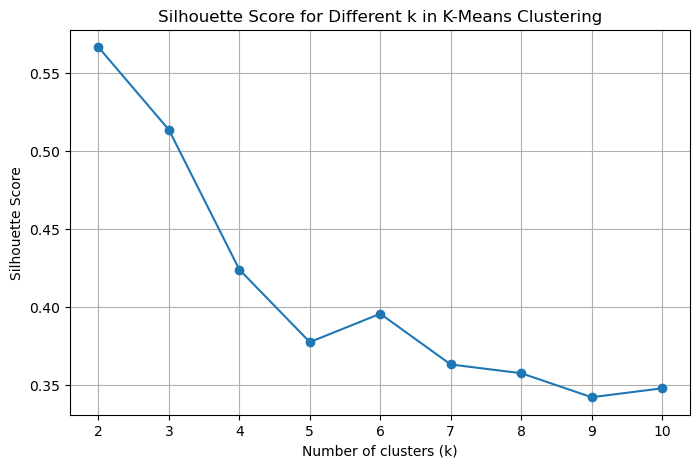

In [5]:
# Plot silhouette scores to visualize optimal k
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k in K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [6]:
# Choose optimal k based on silhouette score and fit KMeans
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k) based on silhouette score: {optimal_k}')

Optimal number of clusters (k) based on silhouette score: 2


In [7]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
housing_data_selected['Cluster'] = kmeans.fit_predict(housing_data_selected)

C:\Users\marco\AppData\Local\Temp\ipykernel_17412\2966237071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data_selected['Cluster'] = kmeans.fit_predict(housing_data_selected)


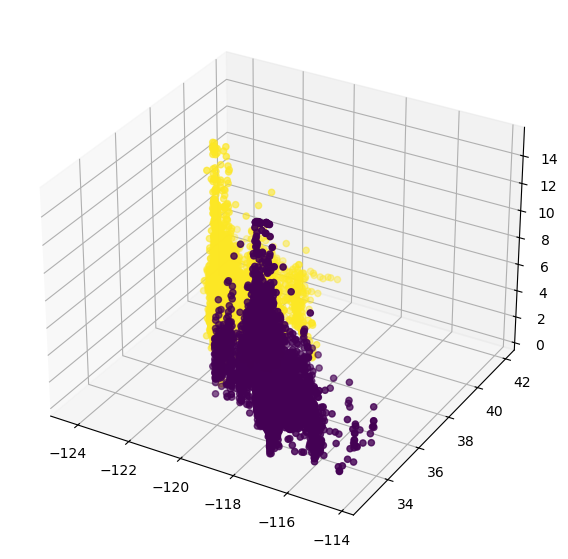

In [8]:
# Visualize clusters in 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(housing_data_selected['Longitude'], housing_data_selected['Latitude'], 
                     housing_data_selected['MedInc'], c=housing_data_selected['Cluster'], cmap='viridis')

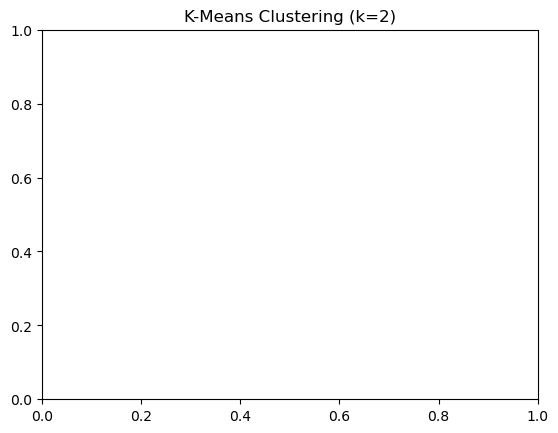

In [9]:
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.colorbar(scatter)
plt.show()

In [10]:
# Analyze and interpret clustering results
for cluster in range(optimal_k):
    cluster_data = housing_data_selected[housing_data_selected['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Number of data points: {len(cluster_data)}")
    print(f"Median income range: {cluster_data['MedInc'].min()} to {cluster_data['MedInc'].max()}")



Cluster 0:
Number of data points: 11943
Median income range: 0.4999 to 15.0001

Cluster 1:
Number of data points: 8697
Median income range: 0.4999 to 15.0001
